In [104]:
import numpy as np, matplotlib.pyplot as plt
from astropy import units as u, constants as c
from astropy.coordinates import SkyCoord, AltAz, concatenate, EarthLocation
from astropy.time import Time
from astropy.table import Table, vstack

In [102]:
# open data file
data = np.load('data_3C273_fixed.npz')
for i in data.keys():
    print('Key: ',i)

I_0 = 42*u.Jy # from NED, at 1.41e9 Hz

dec_deg = data['DEC_degrees']*u.deg
nu = data['frequencies_Hz']*u.Hz
# u_m = data['u_meters']*u.m
# v_m = data['v_meters']*u.m

Key:  vis
Key:  frequencies_Hz
Key:  times_MJD
Key:  u_meters
Key:  v_meters
Key:  DEC_degrees


In [101]:
ovro = EarthLocation(lat=37.2317*u.deg,lon=-118.2951*u.deg)
time = Time(data['times_MJD'], format = 'mjd')
aa = AltAz(obstime = time, location=ovro)

qso = SkyCoord(ra = 187.277915*u.deg, dec = 2.052388*u.deg)

qso_aa = qso.transform_to(aa)

s = [qso_aa.az, qso_aa.alt]

s_proj = [np.sin(s[0]), np.cos(s[0]), np.sin(s[1])]

s_unit_proj = s_proj/np.linalg.norm(s_proj)

s_unit_proj

array([[ 1.18564499e-03,  1.13244366e-03,  1.07924191e-03,
         1.02603974e-03,  9.72837195e-04,  9.19634278e-04,
         8.66431015e-04,  8.13227425e-04,  7.60023528e-04,
         7.06819345e-04,  6.53614895e-04,  6.00410198e-04,
         5.47205275e-04,  4.94000145e-04,  4.40794829e-04,
         3.87589346e-04,  3.34383718e-04,  2.81177963e-04,
         2.27972102e-04,  1.74766155e-04,  1.21560142e-04,
         6.83540837e-05,  1.51479991e-05, -3.80580912e-05,
        -9.12641673e-05, -1.44470209e-04, -1.97676196e-04,
        -2.50882109e-04, -3.04087927e-04, -3.57293630e-04,
        -4.10499199e-04, -4.63704613e-04, -5.16909852e-04,
        -5.70114896e-04, -6.23319725e-04],
       [-1.30945779e-01, -1.30946250e-01, -1.30946699e-01,
        -1.30947126e-01, -1.30947533e-01, -1.30947917e-01,
        -1.30948280e-01, -1.30948621e-01, -1.30948941e-01,
        -1.30949239e-01, -1.30949515e-01, -1.30949770e-01,
        -1.30950003e-01, -1.30950214e-01, -1.30950404e-01,
        -1.30

In [100]:
baseline = 128
# time = 0

u_m = list(data['u_meters'][:,baseline]) #ntimes, nbaselines
v_m = list(data['v_meters'][:,baseline]) #ntimes, nbaselines


b = np.array([u_m, v_m, list(np.zeros(len(u_m)))]) #[u,v,w] 
b

array([[-1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02, -1.78299866e+02,
        -1.78299866e+02, -1.78299866e+02],
       [ 1.06188230e-01,  1.06188230e-01,  1.06188230e-01,
         1.06188230e-01,  1.06188230e-01,  1.06188230e-01,
         1.06188230e-01,  1.06188230e-01,  1.06188230e-01,
         1.06188230e-01,  1.06188230e-01,  1.06188230e-01,
         1.06188230e-01,  1.06188230e-01,  1.06188230e-01,
         1.06

In [99]:
b_ab = []

for t in range(len(b[0])):
    s_dummy = np.array([s_unit_proj[0][t], s_unit_proj[1][t], s_unit_proj[2][t]])
    b_dummy = np.array([b[0][t], b[1][t], b[2][t]])
#     print(s_dummy, b_dummy)
    b_ab.append((b_dummy.dot(s_dummy)))

b_ab = b_ab*u.m
b_ab

# s_unit_proj[0][0]


<Quantity [-0.22530524, -0.2158195 , -0.20633369, -0.19684779, -0.18736183,
           -0.1778758 , -0.1683897 , -0.15890354, -0.14941733, -0.13993106,
           -0.13044475, -0.12095838, -0.11147198, -0.10198553, -0.09249905,
           -0.08301254, -0.073526  , -0.06403943, -0.05455284, -0.04506624,
           -0.03557962, -0.02609299, -0.01660636, -0.00711972,  0.00236692,
            0.01185356,  0.02134018,  0.0308268 ,  0.0403134 ,  0.04979999,
            0.05928655,  0.06877309,  0.0782596 ,  0.08774607,  0.09723251] m>

In [64]:
V_ab = data['vis'][:,baseline,0]*u.Jy

g_ab = V_ab/I_0*np.exp(1j*2*np.pi*b_ab*nu/c.c)
print(g_ab)

[ 1.37652652-0.30635327j  0.33752409+1.62024821j -1.44655169+0.52959286j
 -0.47161411-1.48907201j  1.40566769-0.39527226j  0.58657735+1.44869978j
 -1.35254786+0.54502393j -0.59572262-1.42711287j  1.3494822 -0.4598811j
  0.53183613+1.4698253j  -1.55107725+0.61775403j -0.62322845-1.3669256j
  1.47603688-0.6465275j   0.61707804+1.35427702j -1.4546987 +0.67560469j
 -0.74355135-1.33454809j  1.35798842-0.6247258j   0.73865014+1.35746288j
 -1.26855428+0.75006173j -0.68824313-1.29461162j  1.30385619-0.77057451j
  0.87236941+1.37161412j -1.14642835+0.90594555j -0.79870609-1.33791197j
  1.36069613-0.94812866j  0.90689137+1.17154713j -1.11411857+0.99073727j
 -0.83540963-1.33652603j  1.07879158-0.82549677j  0.83113003+1.07579625j
 -1.01147561+1.02660503j -0.82816432-1.08394681j  1.18860075-0.81301762j
  0.97559829+1.2653052j  -1.1153714 +0.91527243j]


In [24]:
import numpy as np, matplotlib.pyplot as plt
from astropy import units as u, constants as c
from astropy.coordinates import SkyCoord, AltAz, concatenate, EarthLocation
from astropy.time import Time

# open data file
data = np.load('data_3C273_fixed.npz')

I_0 = 42*u.Jy # from NED, at 1.41e9 Hz

dec_deg = data['DEC_degrees']*u.deg
nu = data['frequencies_Hz']*u.Hz

# calculate s

ovro = EarthLocation(lat=37.2317*u.deg,lon=-118.2951*u.deg)
time = Time(data['times_MJD'], format = 'mjd') 
aa = AltAz(obstime = time, location=ovro)

qso = SkyCoord(ra = 187.277915*u.deg, dec = 2.052388*u.deg)

qso_aa = qso.transform_to(aa)

s = [qso_aa.az, qso_aa.alt]

s_proj = [np.sin(s[0]), np.cos(s[0]), np.sin(s[1])]

s_unit_proj = s_proj/np.linalg.norm(s_proj)


def g_ab(baseline):

    base = baseline
    # time = 0

    u_m = list(data['u_meters'][:,base]) #ntimes, nbaselines
    v_m = list(data['v_meters'][:,base]) #ntimes, nbaselines

    b = np.array([u_m, v_m, list(np.zeros(len(u_m)))]) #[u,v,w]
    
    b_ab = []

    for t in range(len(b[0])):
        s_dummy = np.array([s_unit_proj[0][t], s_unit_proj[1][t], s_unit_proj[2][t]])
        b_dummy = np.array([b[0][t], b[1][t], b[2][t]])
    #     print(s_dummy, b_dummy)
        b_ab.append((b_dummy.dot(s_dummy)))

    b_ab = b_ab*u.m
   
    V_ab = data['vis'][:,baseline,0]*u.Jy

    g_ab = V_ab/I_0*np.exp(1j*2*np.pi*b_ab*nu/c.c)
    return g_ab.decompose()

baselines = data['u_meters'].shape[1]

g_abs = []

for i in range(baselines):
    g_abs.append(g_ab(i).value)
g_abs # [baseline, time], uncomment for long list


[array([203.32661438-6.84984696e-12j, 203.28652954-7.13784376e-12j,
        203.04154968-7.41781600e-12j, 203.22625732-7.71399329e-12j,
        203.53497314-8.01546867e-12j, 203.58895874-8.30679994e-12j,
        203.39408875-8.58853294e-12j, 203.39378357-8.87807520e-12j,
        203.72503662-9.18218968e-12j, 203.67990112-9.46980577e-12j,
        203.59393311-9.75576182e-12j, 203.79891968-1.00553960e-11j,
        203.82131958-1.03466555e-11j, 203.49067688-1.06189367e-11j,
        203.6683197 -1.09182906e-11j, 203.6782074 -1.12088888e-11j,
        203.45672607-1.14856836e-11j, 203.44664001-1.17749057e-11j,
        203.28904724-1.20547906e-11j, 203.60795593-1.23638335e-11j,
        203.66201782-1.26569787e-11j, 203.36828613-1.29276429e-11j,
        203.50775146-1.32259129e-11j, 203.68215942-1.35270111e-11j,
        203.45120239-1.38013726e-11j, 203.39997864-1.40873474e-11j,
        203.34263611-1.43726960e-11j, 202.97637939-1.46358375e-11j,
        203.47012329-1.49608869e-11j, 203.501144

In [95]:
print(data['times_MJD'])
print(myst_data['times_MJD'])

[59241.49600415 59241.49604143 59241.49607871 59241.49611599
 59241.49615328 59241.49619056 59241.49622784 59241.49626512
 59241.49630241 59241.49633969 59241.49637697 59241.49641426
 59241.49645154 59241.49648882 59241.4965261  59241.49656339
 59241.49660067 59241.49663795 59241.49667523 59241.49671252
 59241.4967498  59241.49678708 59241.49682437 59241.49686165
 59241.49689893 59241.49693621 59241.4969735  59241.49701078
 59241.49704806 59241.49708534 59241.49712263 59241.49715991
 59241.49719719 59241.49723447 59241.49727176]
[59242.4931069  59242.49314418 59242.49318146 59242.49321874
 59242.49325603 59242.49329331 59242.49333059 59242.49336787
 59242.49340516 59242.49344244 59242.49347972 59242.493517
 59242.49355429 59242.49359157 59242.49362885 59242.49366614
 59242.49370342 59242.4937407  59242.49377798 59242.49381527
 59242.49385255 59242.49388983 59242.49392711 59242.4939644
 59242.49400168 59242.49403896 59242.49407625 59242.49411353
 59242.49415081 59242.49418809 59242.4942

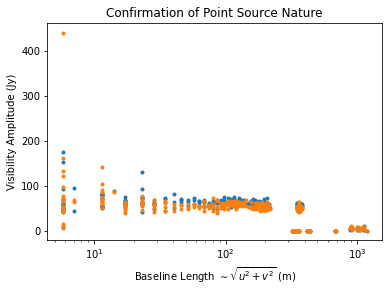

In [101]:
myst_data = np.load('data_mystery_fixed.npz')
# for i in myst_data.keys():
#     print('Key: ',i)


myst_time = Time(data['times_MJD'], format = 'mjd') 

# baseline = [125, 126, 127, 127]

# plt.plot(myst_data['times_MJD'], myst_data['vis'][:,baseline,0])
# plt.show()

baseline_distance = np.sqrt(data['u_meters'][0,:]**2+data['v_meters'][0,:]**2)
amplitude = np.abs(data['vis'][0,:,0])

baseline_distance_myst = np.sqrt(myst_data['u_meters'][0,:]**2+myst_data['v_meters'][0,:]**2)
amplitude_myst = np.abs(myst_data['vis'][0,:,0])

plt.semilogx(baseline_distance[baseline_distance>1e-9], amplitude[baseline_distance>1e-9], '.')
plt.semilogx(baseline_distance_myst[baseline_distance>1e-9], amplitude_myst[baseline_distance>1e-9], '.')
plt.xlabel('Baseline Length $\\sim \\sqrt{u^2+v^2}$ (m)')
plt.ylabel('Visibility Amplitude (Jy)')
plt.title('Confirmation of Point Source Nature')
plt.show()

In [142]:
diff_tab = Table(names=('RA', 'Diff'))

def diff(b1, b2):
    myst_data = np.load('data_mystery_fixed.npz')

    nu = myst_data['frequencies_Hz']*u.Hz
    baseline_1 = b1
    baseline_2 = b2
    t = [0,1]


    V_ab1 = myst_data['vis'][t, baseline_1, 0]
    V_ab2 = myst_data['vis'][t, baseline_2, 0]

    g_ab1 = g_abs[baseline_1][t]
    g_ab2 = g_abs[baseline_2][t]

    # myst_data['u_meters'][t, baseline_1]

    u_m1 = list(myst_data['u_meters'][t,baseline_1]) #ntimes, nbaselines
    v_m1 = list(myst_data['v_meters'][t,baseline_1]) #ntimes, nbaselines

    u_m2 = list(myst_data['u_meters'][t,baseline_2]) #ntimes, nbaselines
    v_m2 = list(myst_data['v_meters'][t,baseline_2]) #ntimes, nbaselines


    b1 = np.array([u_m1, v_m1, list(np.zeros(len(u_m1)))]) #[u,v,w] 
    b2 = np.array([u_m2, v_m2, list(np.zeros(len(u_m2)))]) #[u,v,w] 

    ovro = EarthLocation(lat=37.2317*u.deg,lon=-118.2951*u.deg)
    time = Time(myst_data['times_MJD'], format = 'mjd')
    aa = AltAz(obstime = time, location=ovro)

    ras = np.linspace(0, 359, 360)*u.deg

    # diff_tab = Table(names=('RA', 'Diff'))

    for ra in ras:

        qso = SkyCoord(ra = ra, dec = myst_data['DEC_degrees']*u.deg)

        qso_aa = qso.transform_to(aa)

        s = [qso_aa.az, qso_aa.alt]

        s_proj = [np.sin(s[0]), np.cos(s[0]), np.sin(s[1])]

        s_unit_proj = s_proj/np.linalg.norm(s_proj)

    #     print(s_unit_proj)

        b_ab1 = []
        b_ab2 = []

        for t in range(len(b1[0])): # could also use b2[0]
            s_dummy = np.array([s_unit_proj[0][t], s_unit_proj[1][t], s_unit_proj[2][t]])
            b1_dummy = np.array([b1[0][t], b1[1][t], b1[2][t]])
            b2_dummy = np.array([b2[0][t], b2[1][t], b2[2][t]])
        #     print(s_dummy, b_dummy)
            b_ab1.append((b1_dummy.dot(s_dummy)))
            b_ab2.append((b2_dummy.dot(s_dummy)))

        b_ab1 = b_ab1*u.m
        b_ab2 = b_ab2*u.m
    #     print(b_ab1, b_ab2)

        LHS = V_ab1/g_ab1*np.exp(1j*2*np.pi*b_ab1*nu/c.c)

        RHS = V_ab2/g_ab2*np.exp(1j*2*np.pi*b_ab2*nu/c.c)

        diff = LHS-RHS
    #     print(f'RA: {ra:.2f}, Difference: {np.abs(diff[0]):.2f}')
        diff_tab.add_row([ra, np.abs(diff[0])])

for i in range(100, 125):
    print(i)
    diff(i,i+1)
diff_tab




100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


RA,Diff
float64,float64
0.0,63.897274820696445
1.0,74.00948452680043
2.0,76.94613120447221
3.0,72.25891531533098
4.0,60.295013019270954
5.0,42.19275762157865
6.0,19.807795388093524
7.0,5.3757056855497884
8.0,28.924657813080618


RA of min diff: 131.0 deg


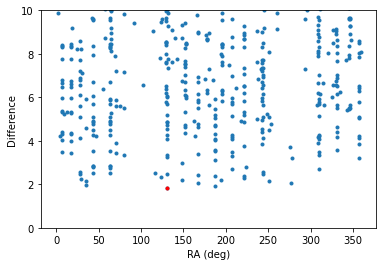

In [143]:
plt.plot(diff_tab['RA'], diff_tab['Diff'], '.')
plt.xlabel('RA (deg)')
plt.ylabel('Difference')
plt.ylim(0,10)

print(f"RA of min diff: {diff_tab[diff_tab['Diff']==np.min(diff_tab['Diff'])]['RA'][0]} deg")

plt.plot(diff_tab[diff_tab['Diff']==np.min(diff_tab['Diff'])]['RA'], diff_tab[diff_tab['Diff']==np.min(diff_tab['Diff'])]['Diff'], 'r.')

plt.show()

[  0.           3.22122574   6.44245148   9.66367722  12.88490295
  16.10612869  19.32735443  22.54858017  25.76980591  28.99103165
  32.21225739  35.43348312  38.65470886  41.8759346   45.09716034
  48.31838608  51.53961182  54.76083755  57.98206329  61.20328903
  64.42451477  67.64574051  70.86696625  74.08819199  77.30941772
  80.53064346  83.7518692   86.97309494  90.19432068  93.41554642
  96.63677216  99.85799789 103.07922363 106.30044937 109.52167511]


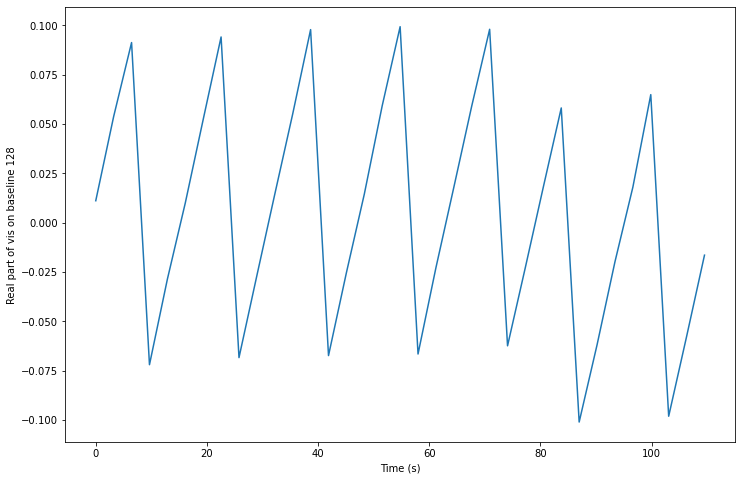

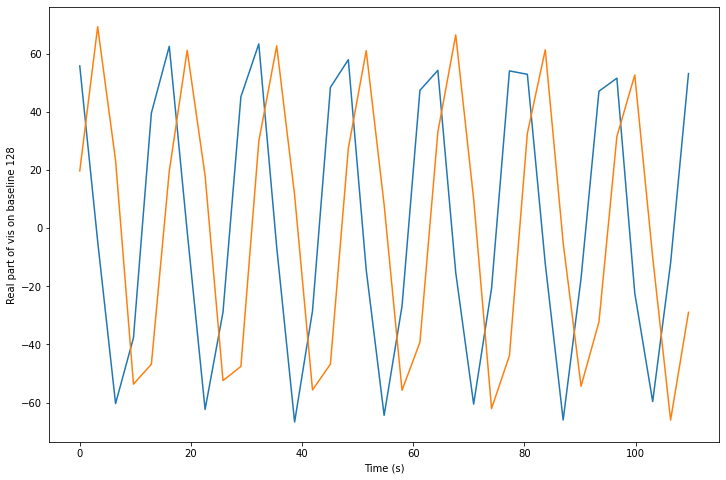

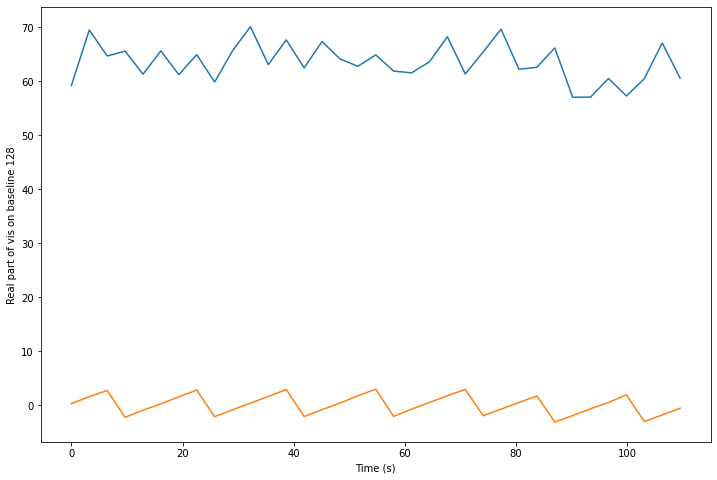

In [4]:
# try plotting time v real part of visibility for a baseline
baseline = 128
times = data['times_MJD']
times = 86400.*(times-times[0]) # to put in seconds
print(times)
real_part = np.real(data['vis'][:,baseline,0]) # shape is [ntimes, nbaselines, npol]
imag_part = np.imag(data['vis'][:,baseline,0]) # shape is [ntimes, nbaselines, npol]

amplitude = np.abs(data['vis'][:,baseline,0])
phase = np.angle(data['vis'][:,baseline,0])

b_ab = (c.c*phase/(2*np.pi*nu)).decompose()
# print(b_ab.decompose())

plt.figure(figsize=(12,8))
plt.plot(times,b_ab)
# plt.plot(times,phase)
plt.xlabel('Time (s)')
plt.ylabel('Real part of vis on baseline '+str(baseline))
plt.show()


plt.figure(figsize=(12,8))
plt.plot(times,real_part)
plt.plot(times,imag_part)
plt.xlabel('Time (s)')
plt.ylabel('Real part of vis on baseline '+str(baseline))
plt.show()

plt.figure(figsize=(12,8))
plt.plot(times,amplitude)
plt.plot(times,phase)
plt.xlabel('Time (s)')
plt.ylabel('Real part of vis on baseline '+str(baseline))
plt.show()

(35, 325)


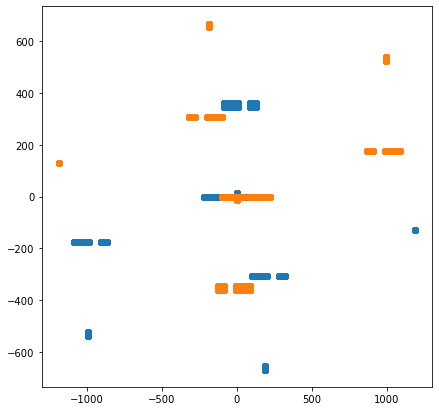

In [4]:
# try plotting uv-coverage
print(data['u_meters'].shape) # shape is [ntimes, nbaselines]
u_m = data['u_meters']
v_m = data['v_meters']
plt.figure(figsize=(7,7))
plt.scatter(u_m,v_m)
plt.scatter(-u_m,-v_m)
plt.show()

In [36]:
# open data file
data = np.load('data_mystery.npz')
for i in data.keys():
    print('Key: ',i)
    
print(data['DEC_degrees'])
print(data['times_MJD'])

Key:  vis
Key:  frequencies_Hz
Key:  times_MJD
Key:  u_meters
Key:  v_meters
Key:  DEC_degrees
2.0
[773.09417725 776.31540298 779.53662872 782.75785446 785.9790802
 789.20030594 792.42153168 795.64275742 798.86398315 802.08520889
 805.30643463 808.52766037 811.74888611 814.97011185 818.19133759
 821.41256332 824.63378906 827.8550148  831.07624054 834.29746628
 837.51869202 840.73991776 843.96114349 847.18236923 850.40359497
 853.62482071 856.84604645 860.06727219 863.28849792 866.50972366
 869.7309494  872.95217514 876.17340088 879.39462662 882.61585236]
